# Analyse Statistique des Diplômés de l'Enseignement Supérieur Public Tunisien

**Projet :** Comprendre la production de diplômés en Tunisie : analyse par domaines, spécialités et établissements

**Étudiant :** Abderrahmen Youssef — Groupe DS4

---

## Problématique

Comment se répartissent les diplômés de l'enseignement supérieur public en Tunisie selon les domaines d'étude, les établissements, les universités et le genre, et quelles structures ou déséquilibres peut-on mettre en évidence à partir des données publiques disponibles ?

---

## Objectifs du projet

1. **Construire un jeu de données propre et lisible** à partir de la table `fact_diplomes` et des tables de correspondance des codes (universités, établissements, domaines, diplômes)

2. **Étudier la répartition des diplômés par sexe** en fonction des domaines, des spécialités et des établissements

3. **Mettre en évidence les domaines et groupes de formation les plus « productifs »** en termes de nombre de diplômés

4. **Comparer les profils de formation** des universités et des établissements (spécialisation, diversité de l'offre de formation, etc.)

5. **Analyser la structure globale du système de formation** à l'aide d'outils d'analyse statistique (analyses croisées et analyse multivariée)

---

## Architecture des données

Le projet repose sur un **modèle en étoile** :
- Une table principale (`fact_diplomes`) contenant les mesures quantitatives
- Quatre tables de correspondance permettant d'enrichir les codes :
  - `uni_code` : universités
  - `etablissment_code` : établissements
  - `domaines_code` : domaines d'étude
  - `diplomes_code` : types de diplômes

---

## 1. Préparation de l'environnement

### 1.1 Chargement des bibliothèques nécessaires

Nous allons utiliser les packages suivants :
- `readxl` : pour lire les fichiers Excel
- `dplyr` : pour la manipulation de données
- `tidyr` : pour le nettoyage des données
- `ggplot2` : pour la visualisation

In [17]:
# Installation des packages si nécessaire
# install.packages(c("readxl", "dplyr", "tidyr", "ggplot2"))

# Chargement des bibliothèques
library(readxl)
library(dplyr)
library(tidyr)
library(ggplot2)

---

## 2. Importation des données brutes

### 2.1 Définition des chemins

Structure du projet :
```
dataset/
├── raw/                  # Données brutes
│   ├── fact_diplomes.xls
│   ├── uni_code.xls
│   ├── etablissment_code.xls
│   ├── domaines_code.xls
│   └── diplomes_code.xls
└── merged/               # Données fusionnées (résultat)
```

In [18]:
# Définir le répertoire de travail
setwd("/home/abdou/Desktop/Higher-Education-Graduates-Analysis")

# Vérifier le répertoire actuel
getwd()

[1] "/home/abdou/Desktop/Higher-Education-Graduates-Analysis"

### 2.2 Chargement de la table principale (fact_diplomes)

Cette table contient les données quantitatives :
- `universite_code` : code de l'université
- `etablissement_code` : code de l'établissement
- `domain_code` : code du domaine d'étude
- `diplome_code` : code du type de diplôme
- `speciality` : spécialité de formation
- `group` : groupe ou famille de spécialités
- `diplomes_M` : nombre de diplômés hommes
- `diplomes_F` : nombre de diplômées femmes
- `diplomes_total` : nombre total de diplômés

In [19]:
# Charger la table des faits (fact_diplomes)
fact_diplomes <- read_excel("dataset/raw/fact_diplomes.xls")

# Afficher un aperçu des données
cat("\n=== TABLE PRINCIPALE : fact_diplomes ===")
cat("\nDimensions:", nrow(fact_diplomes), "lignes x", ncol(fact_diplomes), "colonnes\n")
print(head(fact_diplomes))
cat("\nStructure des données:\n")
str(fact_diplomes)


=== TABLE PRINCIPALE : fact_diplomes ===
Dimensions: 2083 lignes x 9 colonnes
# A tibble: 6 × 9
  universite_code etablissement_code domain_code diplome_code speciality   group
            <dbl>              <dbl>       <dbl> <chr>        <chr>        <chr>
1              13               1301          31 3            إدارة الأعم… تصرف 
2              13               1301          42 2            الأنظمة الم… إعلا…
3              13               1301          42 3            الأنظمة الم… إعلا…
4              13               1301          31 3            التصرف الصن… تصرف 
5              13               1301          31 11           التصرف المن… تصرف 
6              13               1301          53 2            التصرف في ا… هندس…
# ℹ 3 more variables: diplomes_M <dbl>, diplomes_F <dbl>, diplomes_total <dbl>

Structure des données:
tibble [2,083 × 9] (S3: tbl_df/tbl/data.frame)
 $ universite_code   : num [1:2083] 13 13 13 13 13 13 13 13 13 13 ...
 $ etablissement_code: num [1:2083]

### 2.3 Chargement des tables de référence (dimensions)

Ces tables permettent de décoder les codes présents dans la table principale :
1. **uni_code** : Codes et noms des universités
2. **etablissment_code** : Codes et noms des établissements
3. **domaines_code** : Codes et libellés des domaines d'étude
4. **diplomes_code** : Codes et types de diplômes

In [20]:
# Charger les tables de correspondance
uni_code <- read_excel("dataset/raw/uni_code.xls")
etablissment_code <- read_excel("dataset/raw/etablissment_code.xls")
domaines_code <- read_excel("dataset/raw/domaines_code.xls")
diplomes_code <- read_excel("dataset/raw/diplomes_code.xls")

# Afficher la STRUCTURE de chaque table (noms de colonnes)
cat("\n=== TABLE : Universités (uni_code) ===")
cat("\nNombre d'universités:", nrow(uni_code))
cat("\nNoms des colonnes:", paste(names(uni_code), collapse = ", "), "\n")
print(head(uni_code))

cat("\n=== TABLE : Établissements (etablissment_code) ===")
cat("\nNombre d'établissements:", nrow(etablissment_code))
cat("\nNoms des colonnes:", paste(names(etablissment_code), collapse = ", "), "\n")
print(head(etablissment_code))

cat("\n=== TABLE : Domaines (domaines_code) ===")
cat("\nNombre de domaines:", nrow(domaines_code))
cat("\nNoms des colonnes:", paste(names(domaines_code), collapse = ", "), "\n")
print(head(domaines_code))

cat("\n=== TABLE : Diplômes (diplomes_code) ===")
cat("\nNombre de types de diplômes:", nrow(diplomes_code))
cat("\nNoms des colonnes:", paste(names(diplomes_code), collapse = ", "), "\n")
print(head(diplomes_code))


=== TABLE : Universités (uni_code) ===
Nombre d'universités: 14
Noms des colonnes: code, university_fr, university_ar, siteweb, adresse, fax, tel 
# A tibble: 6 × 7
   code university_fr             university_ar     siteweb  adresse fax   tel  
  <dbl> <chr>                     <chr>             <chr>    <chr>   <chr> <chr>
1     1 UNIVERSITE EZZITOUNA      جامعة الزيتونة    www.uz.… 21, ru… 7157… 7157…
2     2 UNIVERSITE DE TUNIS       جامعة تونس        www.utu… 92, Av… 7156… 7156…
3     3 UNIVERSITE TUNIS EL MANAR جامعة تونس المنار www.utm… Campus… 7187… 7187…
4     4 UNIVERSITE DE CARTHAGE    جامعة  قرطاج      www.uca… Avenue… 7174… 71 7…
5     5 UNIVERSITE DE LA  MANOUBA جامعة منوبة       www.uma… Campus… 7160… 71 6…
6     6 UNIVERSITE DE JENDOUBA    جامعة جندوبة      www.uj.… Avenue… 7861… 78 6…

=== TABLE : Établissements (etablissment_code) ===
Nombre d'établissements: 206
Noms des colonnes: etablissement_code, university_code, label_ar, label_fr, website, gouvernorat, type, l

### 2.4 Inspection des noms de colonnes

Avant de fusionner, vérifions les noms exacts des colonnes dans toutes les tables.

In [21]:
# Afficher tous les noms de colonnes pour identification
cat("\n=== RÉCAPITULATIF DES COLONNES ===\n")
cat("\nfact_diplomes:", paste(names(fact_diplomes), collapse = ", "))
cat("\nuni_code:", paste(names(uni_code), collapse = ", "))
cat("\netablissment_code:", paste(names(etablissment_code), collapse = ", "))
cat("\ndomaines_code:", paste(names(domaines_code), collapse = ", "))
cat("\ndiplomes_code:", paste(names(diplomes_code), collapse = ", "), "\n")


=== RÉCAPITULATIF DES COLONNES ===

fact_diplomes: universite_code, etablissement_code, domain_code, diplome_code, speciality, group, diplomes_M, diplomes_F, diplomes_total
uni_code: code, university_fr, university_ar, siteweb, adresse, fax, tel
etablissment_code: etablissement_code, university_code, label_ar, label_fr, website, gouvernorat, type, lat, lon
domaines_code: domain_code, domaine_ar, domaine_fr
diplomes_code: diplome_code, label_fr, label_ar 


---

## 3. Fusion des données (Merge)

### 3.1 Stratégie de fusion

Nous allons fusionner les tables de référence avec la table principale `fact_diplomes` en utilisant des jointures (left join) pour conserver toutes les lignes de la table des faits.

**Ordre des jointures :**
1. Fusionner avec `uni_code` sur `universite_code`
2. Fusionner avec `etablissment_code` sur `etablissement_code`
3. Fusionner avec `domaines_code` sur `domain_code`
4. Fusionner avec `diplomes_code` sur `diplome_code`

### 3.2 Fusion avec les universités

In [24]:
# Étape 1 : Fusion avec la table des universités
# uni_code : code, university_fr (utiliser university_fr comme nom)
data_merged <- fact_diplomes %>%
  left_join(uni_code %>% select(code, university_fr), 
            by = c("universite_code" = "code")) %>%
  rename(universite_nom = university_fr)

cat("\nAprès fusion avec uni_code:")
cat("\nDimensions:", nrow(data_merged), "lignes x", ncol(data_merged), "colonnes")
cat("\nColonnes:", paste(names(data_merged), collapse = ", "), "\n")
print(head(data_merged, 3))


Après fusion avec uni_code:
Dimensions: 2083 lignes x 10 colonnes
Colonnes: universite_code, etablissement_code, domain_code, diplome_code, speciality, group, diplomes_M, diplomes_F, diplomes_total, universite_nom 
# A tibble: 3 × 10
  universite_code etablissement_code domain_code diplome_code speciality   group
            <dbl>              <dbl>       <dbl> <chr>        <chr>        <chr>
1              13               1301          31 3            إدارة الأعم… تصرف 
2              13               1301          42 2            الأنظمة الم… إعلا…
3              13               1301          42 3            الأنظمة الم… إعلا…
# ℹ 4 more variables: diplomes_M <dbl>, diplomes_F <dbl>, diplomes_total <dbl>,
#   universite_nom <chr>


### 3.3 Fusion avec les établissements

In [25]:
# Étape 2 : Fusion avec la table des établissements
# etablissment_code : etablissement_code, label_fr
# Convertir le code en caractère pour éviter les problèmes de type
data_merged <- data_merged %>%
  mutate(etablissement_code = as.character(etablissement_code)) %>%
  left_join(etablissment_code %>% select(etablissement_code, label_fr), 
            by = "etablissement_code") %>%
  rename(etablissement_nom = label_fr)

cat("\nAprès fusion avec etablissment_code:")
cat("\nDimensions:", nrow(data_merged), "lignes x", ncol(data_merged), "colonnes")
cat("\nColonnes:", paste(names(data_merged), collapse = ", "), "\n")
print(head(data_merged, 3))


Après fusion avec etablissment_code:
Dimensions: 2083 lignes x 11 colonnes
Colonnes: universite_code, etablissement_code, domain_code, diplome_code, speciality, group, diplomes_M, diplomes_F, diplomes_total, universite_nom, etablissement_nom 
# A tibble: 3 × 11
  universite_code etablissement_code domain_code diplome_code speciality   group
            <dbl> <chr>                    <dbl> <chr>        <chr>        <chr>
1              13 1301                        31 3            إدارة الأعم… تصرف 
2              13 1301                        42 2            الأنظمة الم… إعلا…
3              13 1301                        42 3            الأنظمة الم… إعلا…
# ℹ 5 more variables: diplomes_M <dbl>, diplomes_F <dbl>, diplomes_total <dbl>,
#   universite_nom <chr>, etablissement_nom <chr>


### 3.4 Fusion avec les domaines d'étude

In [26]:
# Étape 3 : Fusion avec la table des domaines
# domaines_code : domain_code, domaine_fr
data_merged <- data_merged %>%
  left_join(domaines_code %>% select(domain_code, domaine_fr), 
            by = "domain_code") %>%
  rename(domaine_nom = domaine_fr)

cat("\nAprès fusion avec domaines_code:")
cat("\nDimensions:", nrow(data_merged), "lignes x", ncol(data_merged), "colonnes")
cat("\nColonnes:", paste(names(data_merged), collapse = ", "), "\n")
print(head(data_merged, 3))


Après fusion avec domaines_code:
Dimensions: 2083 lignes x 12 colonnes
Colonnes: universite_code, etablissement_code, domain_code, diplome_code, speciality, group, diplomes_M, diplomes_F, diplomes_total, universite_nom, etablissement_nom, domaine_nom 
# A tibble: 3 × 12
  universite_code etablissement_code domain_code diplome_code speciality   group
            <dbl> <chr>                    <dbl> <chr>        <chr>        <chr>
1              13 1301                        31 3            إدارة الأعم… تصرف 
2              13 1301                        42 2            الأنظمة الم… إعلا…
3              13 1301                        42 3            الأنظمة الم… إعلا…
# ℹ 6 more variables: diplomes_M <dbl>, diplomes_F <dbl>, diplomes_total <dbl>,
#   universite_nom <chr>, etablissement_nom <chr>, domaine_nom <chr>


### 3.5 Fusion avec les types de diplômes

In [27]:
# Étape 4 : Fusion avec la table des diplômes
# diplomes_code : diplome_code, label_fr
data_merged <- data_merged %>%
  left_join(diplomes_code %>% select(diplome_code, label_fr), 
            by = "diplome_code") %>%
  rename(diplome_nom = label_fr)

cat("\nAprès fusion avec diplomes_code:")
cat("\nDimensions:", nrow(data_merged), "lignes x", ncol(data_merged), "colonnes")
cat("\nColonnes:", paste(names(data_merged), collapse = ", "), "\n")
print(head(data_merged, 3))


Après fusion avec diplomes_code:
Dimensions: 2083 lignes x 13 colonnes
Colonnes: universite_code, etablissement_code, domain_code, diplome_code, speciality, group, diplomes_M, diplomes_F, diplomes_total, universite_nom, etablissement_nom, domaine_nom, diplome_nom 
# A tibble: 3 × 13
  universite_code etablissement_code domain_code diplome_code speciality   group
            <dbl> <chr>                    <dbl> <chr>        <chr>        <chr>
1              13 1301                        31 3            إدارة الأعم… تصرف 
2              13 1301                        42 2            الأنظمة الم… إعلا…
3              13 1301                        42 3            الأنظمة الم… إعلا…
# ℹ 7 more variables: diplomes_M <dbl>, diplomes_F <dbl>, diplomes_total <dbl>,
#   universite_nom <chr>, etablissement_nom <chr>, domaine_nom <chr>,
#   diplome_nom <chr>


---

## 4. Nettoyage et réorganisation du dataset final

### 4.1 Sélection et réorganisation des colonnes

Nous allons créer un dataset final avec les colonnes dans un ordre logique et lisible.

In [32]:
# Réorganiser les colonnes - SANS les codes, uniquement les noms
diplomes_final <- data_merged %>%
  select(
    # Noms uniquement (pas de codes)
    universite_nom,
    etablissement_nom,
    domaine_nom,
    speciality,
    group,
    diplome_nom,
    
    # Statistiques sur les diplômés
    diplomes_M,
    diplomes_F,
    diplomes_total
  )

cat("\n=== DATASET FINAL FUSIONNÉ ===")
cat("\nDimensions:", nrow(diplomes_final), "lignes x", ncol(diplomes_final), "colonnes\n")
cat("\nAperçu des premières lignes:\n")
print(head(diplomes_final, 10))


=== DATASET FINAL FUSIONNÉ ===
Dimensions: 2083 lignes x 9 colonnes

Aperçu des premières lignes:
# A tibble: 10 × 9
   universite_nom     etablissement_nom domaine_nom speciality group diplome_nom
   <chr>              <chr>             <chr>       <chr>      <chr> <chr>      
 1 DIRECTION GENERAL… Institut Supérie… Affaires c… إدارة الأ… تصرف  Diplôme Na…
 2 DIRECTION GENERAL… Institut Supérie… Sciences  … الأنظمة ا… إعلا… Licence ap…
 3 DIRECTION GENERAL… Institut Supérie… Sciences  … الأنظمة ا… إعلا… Diplôme Na…
 4 DIRECTION GENERAL… Institut Supérie… Affaires c… التصرف ال… تصرف  Diplôme Na…
 5 DIRECTION GENERAL… Institut Supérie… Affaires c… التصرف ال… تصرف  Mastère pr…
 6 DIRECTION GENERAL… Institut Supérie… Ingénierie… التصرف في… هندس… Licence ap…
 7 DIRECTION GENERAL… Institut Supérie… Affaires c… التصرف في… تصرف  Licence ap…
 8 DIRECTION GENERAL… Institut Supérie… Sciences  … الشبكات و… إعلا… Diplôme Na…
 9 DIRECTION GENERAL… Institut Supérie… Services d… الوجستيك … تصرف… Lic

### 4.3 Statistiques descriptives du dataset fusionné

In [33]:
cat("\n=== STATISTIQUES DESCRIPTIVES ===")

# Nombre total de diplômés
total_diplomes <- sum(diplomes_final$diplomes_total, na.rm = TRUE)
total_hommes <- sum(diplomes_final$diplomes_M, na.rm = TRUE)
total_femmes <- sum(diplomes_final$diplomes_F, na.rm = TRUE)

cat("\nTotal général des diplômés:", total_diplomes)
cat("\n  - Hommes:", total_hommes, sprintf("(%.1f%%)", (total_hommes/total_diplomes)*100))
cat("\n  - Femmes:", total_femmes, sprintf("(%.1f%%)", (total_femmes/total_diplomes)*100))

# Nombre d'universités, établissements, domaines (utiliser les noms maintenant)
cat("\n\nNombre d'entités distinctes:")
cat("\n  - Universités:", n_distinct(diplomes_final$universite_nom))
cat("\n  - Établissements:", n_distinct(diplomes_final$etablissement_nom))
cat("\n  - Domaines:", n_distinct(diplomes_final$domaine_nom))
cat("\n  - Types de diplômes:", n_distinct(diplomes_final$diplome_nom))
cat("\n  - Spécialités:", n_distinct(diplomes_final$speciality))
cat("\n  - Groupes:", n_distinct(diplomes_final$group))


=== STATISTIQUES DESCRIPTIVES ===
Total général des diplômés: 55670
  - Hommes: 16722 (30.0%)
  - Femmes: 38948 (70.0%)

Nombre d'entités distinctes:
  - Universités: 14
  - Établissements: 189
  - Domaines: 22
  - Types de diplômes: 14
  - Spécialités: 1202
  - Groupes: 79

---

## 5. Export du dataset fusionné

In [34]:
# Créer le dossier merged s'il n'existe pas
if(!dir.exists("dataset/merged")) {
  dir.create("dataset/merged", recursive = TRUE)
  cat("Dossier 'dataset/merged' créé\n")
}

# Sauvegarder le dataset fusionné au format CSV
write.csv(diplomes_final, "dataset/merged/diplomes_fusionnes.csv", row.names = FALSE, fileEncoding = "UTF-8")

cat("\n✓ Dataset fusionné sauvegardé avec succès !")
cat("\n  Fichier: dataset/merged/diplomes_fusionnes.csv")
cat("\n  Dimensions:", nrow(diplomes_final), "lignes x", ncol(diplomes_final), "colonnes\n")


✓ Dataset fusionné sauvegardé avec succès !
  Fichier: dataset/merged/diplomes_fusionnes.csv
  Dimensions: 2083 lignes x 9 colonnes


---

## 6. Conclusion de l'étape de fusion

✅ **Étape 1 terminée : Fusion des données**

Nous avons réussi à :
1. Importer les 5 fichiers Excel (1 table de faits + 4 tables de référence)
2. Fusionner les tables en utilisant des jointures sur les codes
3. Créer un dataset enrichi avec les libellés explicites
4. Générer des statistiques descriptives complètes
5. Exporter le résultat dans `dataset/merged/diplomes_fusionnes.csv`

**Prochaines étapes :**
- Analyse descriptive approfondie
- Visualisations statistiques (répartition par genre, domaine, université)
- Analyses croisées par genre, domaine, université
- Analyse multivariée (ACP, clustering)

---

# PARTIE 2 : ANALYSES STATISTIQUES APPROFONDIES

---

## Analyse 1 : Répartition des diplômés par genre (F/M)

### 📊 Objectif
Analyser la distribution des diplômés hommes et femmes selon différentes dimensions (domaines, universités, types de diplômes) pour identifier les déséquilibres de genre.

### 🔍 Méthodes utilisées :
- **Tableaux croisés** : Comptage des effectifs par catégories (genre × domaine, genre × université...)
- **Barplots** : Visualisation des proportions
- **Stacked bars** : Comparaison des proportions empilées
- **Heatmaps** : Visualisation matricielle des intensités

### 1.1 Statistiques générales par genre

In [37]:
# Vue d'ensemble de la répartition par genre
cat("\n=== RÉPARTITION GLOBALE PAR GENRE ===\n")

# Calcul des totaux et pourcentages
total_H <- sum(diplomes_final$diplomes_M)
total_F <- sum(diplomes_final$diplomes_F)
total_global <- sum(diplomes_final$diplomes_total)

cat("\nTotal Hommes:", total_H, sprintf("(%.1f%%)", (total_H/total_global)*100))
cat("\nTotal Femmes:", total_F, sprintf("(%.1f%%)", (total_F/total_global)*100))

# Ratio Femmes/Hommes
ratio_FH <- total_F / total_H
cat("\n\nRatio Femmes/Hommes:", round(ratio_FH, 2), ":1")
cat("\nPour 1 homme diplômé, il y a", round(ratio_FH, 2), "femmes diplômées\n")


=== RÉPARTITION GLOBALE PAR GENRE ===

Total Hommes: 16722 (30.0%)
Total Femmes: 38948 (70.0%)

Ratio Femmes/Hommes: 2.33 :1
Pour 1 homme diplômé, il y a 2.33 femmes diplômées


### 1.2 Répartition par domaine

**🔬 Analyse croisée** : Croisement de deux variables catégorielles (Domaine × Genre) pour analyser les effectifs et proportions dans chaque combinaison.

In [38]:
# Agrégation par domaine et genre
genre_domaine <- diplomes_final %>%
  group_by(domaine_nom) %>%
  summarise(
    Hommes = sum(diplomes_M),
    Femmes = sum(diplomes_F),
    Total = sum(diplomes_total)
  ) %>%
  mutate(
    Pct_Femmes = round((Femmes / Total) * 100, 1),
    Pct_Hommes = round((Hommes / Total) * 100, 1),
    Dominant = ifelse(Pct_Femmes > 60, "Féminin",
                     ifelse(Pct_Hommes > 60, "Masculin", "Équilibré"))
  ) %>%
  arrange(desc(Pct_Femmes))

cat("\n=== TOP 10 DOMAINES LES PLUS FÉMININS ===\n")
print(head(genre_domaine %>% select(domaine_nom, Pct_Femmes, Pct_Hommes, Dominant), 10))

cat("\n=== TOP 10 DOMAINES LES PLUS MASCULINS ===\n")
print(tail(genre_domaine %>% select(domaine_nom, Pct_Femmes, Pct_Hommes, Dominant), 10))


=== TOP 10 DOMAINES LES PLUS FÉMININS ===


# A tibble: 10 × 4
   domaine_nom                                    Pct_Femmes Pct_Hommes Dominant
   <chr>                                               <dbl>      <dbl> <chr>   
 1 Protection de l’environnement                        92.1        7.9 Féminin 
 2 Services sociaux                                     91.5        8.5 Féminin 
 3 Sciences de la vie                                   91.3        8.7 Féminin 
 4 Formation des formateurs et sciences de l’édu…       88.8       11.2 Féminin 
 5 Industrie de transformation et de traitement         86.6       13.4 Féminin 
 6 Sciences vétérinaires                                85.7       14.3 Féminin 
 7 Journalisme et sciences de l’information             84.8       15.2 Féminin 
 8 Sciences physiques                                   82.2       17.8 Féminin 
 9 Droit                                                80.1       19.9 Féminin 
10 Lettres                                              79.6       20.4 Féminin 

=== TOP 

### 1.3 Visualisation : Barplot des domaines par genre

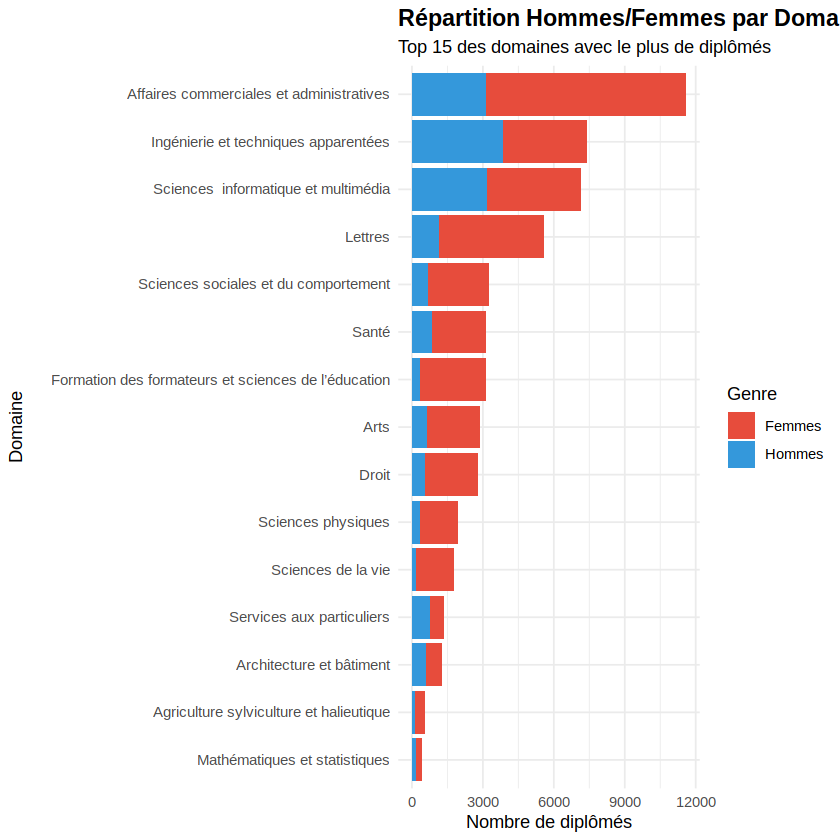

In [39]:
# Préparer les données pour le graphique (TOP 15 domaines)
top_domaines <- genre_domaine %>% 
  arrange(desc(Total)) %>% 
  head(15)

# Transformer en format long pour ggplot2
top_domaines_long <- top_domaines %>%
  select(domaine_nom, Hommes, Femmes) %>%
  pivot_longer(cols = c(Hommes, Femmes), names_to = "Genre", values_to = "Effectif")

# Graphique en barres empilées (stacked bar)
ggplot(top_domaines_long, aes(x = reorder(domaine_nom, Effectif), y = Effectif, fill = Genre)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  scale_fill_manual(values = c("Hommes" = "#3498db", "Femmes" = "#e74c3c")) +
  labs(
    title = "Répartition Hommes/Femmes par Domaine",
    subtitle = "Top 15 des domaines avec le plus de diplômés",
    x = "Domaine",
    y = "Nombre de diplômés",
    fill = "Genre"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    axis.text.y = element_text(size = 9)
  )

### 1.4 Parité dans les universités

Analyse de l'équilibre genre dans chaque université.

In [40]:
# Analyse par université
genre_universite <- diplomes_final %>%
  group_by(universite_nom) %>%
  summarise(
    Hommes = sum(diplomes_M),
    Femmes = sum(diplomes_F),
    Total = sum(diplomes_total)
  ) %>%
  mutate(
    Pct_Femmes = round((Femmes / Total) * 100, 1),
    Pct_Hommes = round((Hommes / Total) * 100, 1),
    Ecart_parite = abs(50 - Pct_Femmes),  # Distance à la parité parfaite (50/50)
    Niveau_parite = ifelse(Ecart_parite < 10, "Bonne parité",
                           ifelse(Ecart_parite < 20, "Parité moyenne", "Déséquilibre fort"))
  ) %>%
  arrange(Ecart_parite)

cat("\n=== UNIVERSITÉS AVEC LA MEILLEURE PARITÉ ===\n")
print(head(genre_universite %>% select(universite_nom, Pct_Femmes, Pct_Hommes, Ecart_parite, Niveau_parite), 5))

cat("\n=== UNIVERSITÉS AVEC LE PLUS DE DÉSÉQUILIBRE ===\n")
print(tail(genre_universite %>% select(universite_nom, Pct_Femmes, Pct_Hommes, Ecart_parite, Niveau_parite), 5))


=== UNIVERSITÉS AVEC LA MEILLEURE PARITÉ ===
# A tibble: 5 × 5
  universite_nom                Pct_Femmes Pct_Hommes Ecart_parite Niveau_parite
  <chr>                              <dbl>      <dbl>        <dbl> <chr>        
1 Université Virtuelle de Tunis       48.9       51.1         1.10 Bonne parité 
2 DIRECTION GENERALE DES ETUDE…       52.2       47.8         2.20 Bonne parité 
3 UNIVERSITE EZZITOUNA                60.2       39.8        10.2  Parité moyen…
4 UNIVERSITE DE LA  MANOUBA           66.8       33.2        16.8  Parité moyen…
5 UNIVERSITE TUNIS EL MANAR           70.9       29.1        20.9  Déséquilibre…

=== UNIVERSITÉS AVEC LE PLUS DE DÉSÉQUILIBRE ===
# A tibble: 5 × 5
  universite_nom         Pct_Femmes Pct_Hommes Ecart_parite Niveau_parite    
  <chr>                       <dbl>      <dbl>        <dbl> <chr>            
1 UNIVERSITE DE TUNIS          73.3       26.7         23.3 Déséquilibre fort
2 UNIVERSITE DE GAFSA          75.8       24.2         25.8 Déséqui

---

## Analyse 2 : Domaines les plus saturés (productifs)

### 📊 Objectif
Identifier les domaines qui produisent le plus de diplômés (domaines "hyper-productifs") et analyser la concentration de la production académique.

### 🔍 Méthode : Analyse univariée
Comptage et agrégation des effectifs par domaine, calcul de proportions cumulées (courbe de Lorenz/Pareto).

In [41]:
# Classement des domaines par nombre de diplômés
domaines_prodution <- diplomes_final %>%
  group_by(domaine_nom) %>%
  summarise(Total_diplomes = sum(diplomes_total)) %>%
  arrange(desc(Total_diplomes)) %>%
  mutate(
    Pct = round((Total_diplomes / sum(Total_diplomes)) * 100, 2),
    Pct_cumule = cumsum(Pct),
    Rang = row_number()
  )

cat("\n=== TOP 10 DOMAINES LES PLUS PRODUCTIFS ===\n")
print(head(domaines_prodution, 10))

# Analyse de concentration (Pareto)
top5_pct <- sum(head(domaines_prodution$Pct, 5))
top10_pct <- sum(head(domaines_prodution$Pct, 10))

cat("\n=== CONCENTRATION DE LA PRODUCTION ===")
cat("\nLes 5 premiers domaines représentent:", round(top5_pct, 1), "% des diplômés")
cat("\nLes 10 premiers domaines représentent:", round(top10_pct, 1), "% des diplômés")
cat("\n\n➡️ Cela indique une", ifelse(top10_pct > 70, "forte", "moyenne"), "concentration de la production académique\n")


=== TOP 10 DOMAINES LES PLUS PRODUCTIFS ===
# A tibble: 10 × 5
   domaine_nom                             Total_diplomes   Pct Pct_cumule  Rang
   <chr>                                            <dbl> <dbl>      <dbl> <int>
 1 Affaires commerciales et administrativ…          11591 20.8        20.8     1
 2 Ingénierie et techniques apparentées              7384 13.3        34.1     2
 3 Sciences  informatique et multimédia              7144 12.8        46.9     3
 4 Lettres                                           5564  9.99       56.9     4
 5 Sciences sociales et du comportement              3250  5.84       62.7     5
 6 Formation des formateurs et sciences d…           3135  5.63       68.4     6
 7 Santé                                             3135  5.63       74       7
 8 Arts                                              2880  5.17       79.2     8
 9 Droit                                             2791  5.01       84.2     9
10 Sciences physiques                        

### 2.1 Visualisation : Graphique Pareto

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


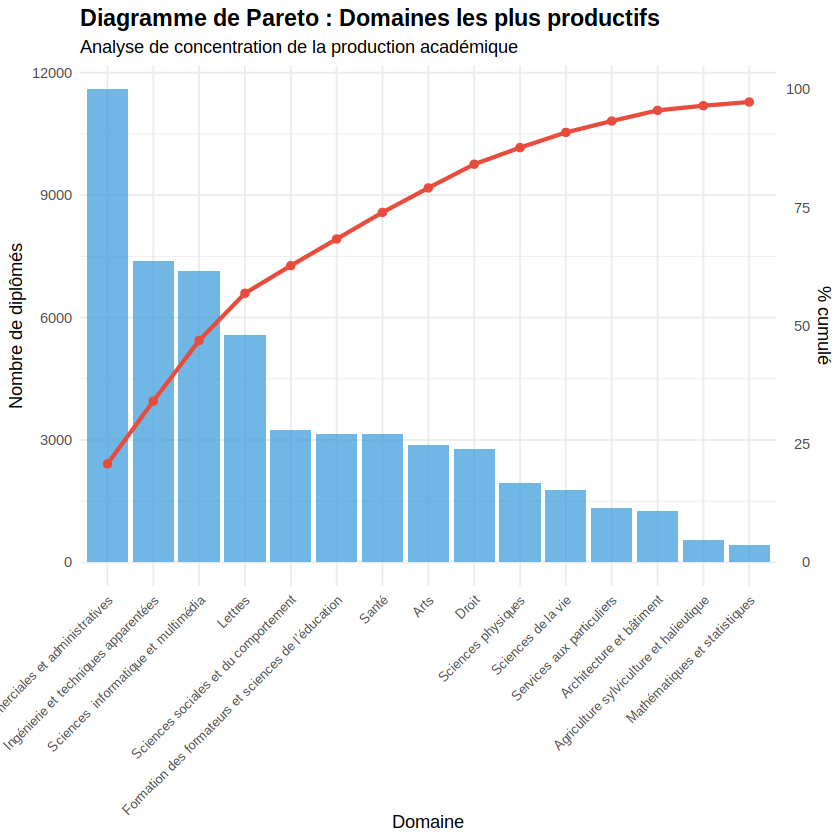

In [42]:
# Graphique Pareto (barres + courbe cumulative)
top15_domaines <- head(domaines_prodution, 15)

ggplot(top15_domaines, aes(x = reorder(domaine_nom, -Total_diplomes))) +
  geom_bar(aes(y = Total_diplomes), stat = "identity", fill = "#3498db", alpha = 0.7) +
  geom_line(aes(y = Pct_cumule * max(Total_diplomes) / 100, group = 1), 
            color = "#e74c3c", size = 1.2) +
  geom_point(aes(y = Pct_cumule * max(Total_diplomes) / 100), 
             color = "#e74c3c", size = 2) +
  scale_y_continuous(
    name = "Nombre de diplômés",
    sec.axis = sec_axis(~. * 100 / max(top15_domaines$Total_diplomes), name = "% cumulé")
  ) +
  labs(
    title = "Diagramme de Pareto : Domaines les plus productifs",
    subtitle = "Analyse de concentration de la production académique",
    x = "Domaine"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
    plot.title = element_text(face = "bold", size = 14)
  )

---

## Analyse 3 : Performance des établissements

### 📊 Objectif
Classer les établissements selon leur production de diplômés et analyser leur spécialisation.

### 🔍 Méthode : Analyse univariée + analyse de spécialisation
Classement par effectifs, calcul d'indices de concentration (Herfindahl) pour mesurer la spécialisation.

In [43]:
# Classement des établissements
etablissements_ranking <- diplomes_final %>%
  group_by(etablissement_nom, universite_nom) %>%
  summarise(
    Total_diplomes = sum(diplomes_total),
    Nb_domaines = n_distinct(domaine_nom),
    Nb_specialites = n_distinct(speciality)
  ) %>%
  arrange(desc(Total_diplomes)) %>%
  ungroup() %>%
  mutate(Rang = row_number())

cat("\n=== TOP 20 ÉTABLISSEMENTS LES PLUS PRODUCTIFS ===\n")
print(head(etablissements_ranking, 20))

`summarise()` has grouped output by 'etablissement_nom'. You can override using
the `.groups` argument.



=== TOP 20 ÉTABLISSEMENTS LES PLUS PRODUCTIFS ===
# A tibble: 20 × 6
   etablissement_nom    universite_nom Total_diplomes Nb_domaines Nb_specialites
   <chr>                <chr>                   <dbl>       <int>          <int>
 1 Faculté des Science… UNIVERSITE TU…           1467           7             57
 2 Institut Supérieur … UNIVERSITE DE…           1265           3              9
 3 Faculté des Science… UNIVERSITE TU…           1197           4             22
 4 Faculté des Science… UNIVERSITE DE…           1025           4             22
 5 Faculté des Science… UNIVERSITE DE…            979           3             29
 6 Institut Supérieur … UNIVERSITE DE…            911           3             20
 7 Institut Supérieur … UNIVERSITE DE…            876           1             13
 8 NA                   DIRECTION GEN…            876           3             22
 9 Institut Supérieur … UNIVERSITE DE…            875           4             24
10 Institut Supérieur … DIRECTION GEN… 

---

## Analyse 4 : Analyse croisée Domaine × Type de diplôme

### 📊 Objectif
Analyser la structure des diplômes (Licence, Mastère, Doctorat...) dans chaque domaine.

### 🔍 Méthode : Tableau croisé (contingence)
**Tableau de contingence** : Matrice croisant deux variables catégorielles pour observer les fréquences dans chaque cellule. Permet d'identifier les associations entre domaines et types de diplômes.

In [44]:
# Tableau croisé : Domaine × Type de diplôme
domaine_diplome <- diplomes_final %>%
  group_by(domaine_nom, diplome_nom) %>%
  summarise(Total = sum(diplomes_total)) %>%
  arrange(domaine_nom, desc(Total))

# TOP 10 domaines : quel type de diplôme domine ?
top_domaines_list <- domaines_prodution$domaine_nom[1:10]

analyse_croisee <- domaine_diplome %>%
  filter(domaine_nom %in% top_domaines_list) %>%
  group_by(domaine_nom) %>%
  mutate(Pct_dans_domaine = round((Total / sum(Total)) * 100, 1)) %>%
  arrange(domaine_nom, desc(Pct_dans_domaine))

cat("\n=== ANALYSE CROISÉE : TOP 10 DOMAINES × TYPE DE DIPLÔME ===\n")
for(dom in top_domaines_list) {
  cat("\n", dom, ":\n")
  subset_dom <- analyse_croisee %>% filter(domaine_nom == dom) %>% head(3)
  print(subset_dom %>% select(diplome_nom, Total, Pct_dans_domaine))
}

`summarise()` has grouped output by 'domaine_nom'. You can override using the
`.groups` argument.



=== ANALYSE CROISÉE : TOP 10 DOMAINES × TYPE DE DIPLÔME ===

 Affaires commerciales et administratives :


Adding missing grouping variables: `domaine_nom`


# A tibble: 3 × 4
# Groups:   domaine_nom [1]
  domaine_nom                              diplome_nom    Total Pct_dans_domaine
  <chr>                                    <chr>          <dbl>            <dbl>
1 Affaires commerciales et administratives Diplôme Natio…  7739             66.8
2 Affaires commerciales et administratives Mastère profe…  2468             21.3
3 Affaires commerciales et administratives Mastère de re…   514              4.4

 Ingénierie et techniques apparentées :


Adding missing grouping variables: `domaine_nom`


# A tibble: 3 × 4
# Groups:   domaine_nom [1]
  domaine_nom                          diplome_nom        Total Pct_dans_domaine
  <chr>                                <chr>              <dbl>            <dbl>
1 Ingénierie et techniques apparentées Diplôme National …  4059             55  
2 Ingénierie et techniques apparentées Diplôme national …  1496             20.3
3 Ingénierie et techniques apparentées Mastère professio…   793             10.7

 Sciences  informatique et multimédia :


Adding missing grouping variables: `domaine_nom`


# A tibble: 3 × 4
# Groups:   domaine_nom [1]
  domaine_nom                          diplome_nom        Total Pct_dans_domaine
  <chr>                                <chr>              <dbl>            <dbl>
1 Sciences  informatique et multimédia Diplôme National …  4386             61.4
2 Sciences  informatique et multimédia Diplôme national …  1147             16.1
3 Sciences  informatique et multimédia Mastère professio…   846             11.8

 Lettres :


Adding missing grouping variables: `domaine_nom`


# A tibble: 3 × 4
# Groups:   domaine_nom [1]
  domaine_nom diplome_nom                 Total Pct_dans_domaine
  <chr>       <chr>                       <dbl>            <dbl>
1 Lettres     Diplôme National en Licence  3478             62.5
2 Lettres     Mastère de recherche         1006             18.1
3 Lettres     Mastère professionnel         539              9.7

 Sciences sociales et du comportement :


Adding missing grouping variables: `domaine_nom`


# A tibble: 3 × 4
# Groups:   domaine_nom [1]
  domaine_nom                          diplome_nom        Total Pct_dans_domaine
  <chr>                                <chr>              <dbl>            <dbl>
1 Sciences sociales et du comportement Diplôme National …  2294             70.6
2 Sciences sociales et du comportement Mastère professio…   508             15.6
3 Sciences sociales et du comportement Mastère de recher…   283              8.7

 Formation des formateurs et sciences de l’éducation :


Adding missing grouping variables: `domaine_nom`


# A tibble: 3 × 4
# Groups:   domaine_nom [1]
  domaine_nom                                 diplome_nom Total Pct_dans_domaine
  <chr>                                       <chr>       <dbl>            <dbl>
1 Formation des formateurs et sciences de l’… Diplôme Na…  2812             89.7
2 Formation des formateurs et sciences de l’… Licence ap…   204              6.5
3 Formation des formateurs et sciences de l’… Mastère pr…    77              2.5

 Santé :


Adding missing grouping variables: `domaine_nom`


# A tibble: 3 × 4
# Groups:   domaine_nom [1]
  domaine_nom diplome_nom                 Total Pct_dans_domaine
  <chr>       <chr>                       <dbl>            <dbl>
1 Santé       Diplôme National en Licence  1421             45.3
2 Santé       Doctorat en médecine         1069             34.1
3 Santé       Doctorat en pharmacie         236              7.5

 Arts :


Adding missing grouping variables: `domaine_nom`


# A tibble: 3 × 4
# Groups:   domaine_nom [1]
  domaine_nom diplome_nom                 Total Pct_dans_domaine
  <chr>       <chr>                       <dbl>            <dbl>
1 Arts        Diplôme National en Licence  1819             63.2
2 Arts        Mastère professionnel         625             21.7
3 Arts        Mastère de recherche          267              9.3

 Droit :


Adding missing grouping variables: `domaine_nom`


# A tibble: 3 × 4
# Groups:   domaine_nom [1]
  domaine_nom diplome_nom                 Total Pct_dans_domaine
  <chr>       <chr>                       <dbl>            <dbl>
1 Droit       Diplôme National en Licence  1750             62.7
2 Droit       Mastère de recherche          485             17.4
3 Droit       Mastère professionnel         458             16.4

 Sciences physiques :


Adding missing grouping variables: `domaine_nom`


# A tibble: 3 × 4
# Groups:   domaine_nom [1]
  domaine_nom        diplome_nom                 Total Pct_dans_domaine
  <chr>              <chr>                       <dbl>            <dbl>
1 Sciences physiques Diplôme National en Licence  1005             51.5
2 Sciences physiques Mastère de recherche          339             17.4
3 Sciences physiques Mastère professionnel         286             14.7


---

## Analyse 5 : Analyse Multivariée (ACP - Analyse en Composantes Principales)

### 📊 Objectif
Réduire la complexité des données et identifier des profils d'universités/domaines similaires.

### 🔍 Méthode : ACP (PCA en anglais)

**L'Analyse en Composantes Principales (ACP)** est une méthode statistique de réduction de dimensionnalité :

**📌 Principe :**
- Transforme un ensemble de variables corrélées en un ensemble plus petit de variables non corrélées (composantes principales)
- Chaque composante principale est une combinaison linéaire des variables originales
- Les premières composantes capturent le maximum de variance des données

**📌 Utilité :**
- Visualiser des données multidimensionnelles en 2D ou 3D
- Identifier des groupes/profils similaires
- Détecter les variables les plus importantes
- Réduire le bruit dans les données

**📌 Dans notre cas :**
Nous allons créer un profil pour chaque domaine basé sur :
- Répartition hommes/femmes
- Types de diplômes produits
- Volumes de production

Cela permettra de voir quels domaines ont des profils similaires.

In [45]:
# Préparer les données pour l'ACP : créer une matrice Domaine × Variables numériques
# Variables : % Femmes, % Hommes, Total diplômés, diversité des diplômes

pca_data <- diplomes_final %>%
  group_by(domaine_nom) %>%
  summarise(
    Total_diplomes = sum(diplomes_total),
    Pct_Femmes = (sum(diplomes_F) / sum(diplomes_total)) * 100,
    Pct_Hommes = (sum(diplomes_M) / sum(diplomes_total)) * 100,
    Nb_types_diplomes = n_distinct(diplome_nom),
    Nb_specialites = n_distinct(speciality),
    Nb_etablissements = n_distinct(etablissement_nom)
  ) %>%
  filter(Total_diplomes > 100)  # Filtrer les domaines avec peu de diplômés

# Préparer pour l'ACP (sans la colonne des noms)
pca_matrix <- pca_data %>% 
  select(-domaine_nom) %>%
  as.data.frame()

rownames(pca_matrix) <- pca_data$domaine_nom

# Standardisation et ACP
pca_result <- prcomp(pca_matrix, scale. = TRUE, center = TRUE)

# Résumé de l'ACP
cat("\n=== RÉSUMÉ DE L'ACP ===\n")
summary(pca_result)

# Variance expliquée
variance_expliquee <- (pca_result$sdev^2 / sum(pca_result$sdev^2)) * 100
cat("\n=== VARIANCE EXPLIQUÉE PAR COMPOSANTE ===")
cat("\nPC1:", round(variance_expliquee[1], 2), "%")
cat("\nPC2:", round(variance_expliquee[2], 2), "%")
cat("\nTotal (PC1 + PC2):", round(sum(variance_expliquee[1:2]), 2), "%\n")


=== RÉSUMÉ DE L'ACP ===


Importance of components:
                          PC1    PC2    PC3     PC4     PC5       PC6
Standard deviation     1.9300 1.2040 0.7462 0.42558 0.29581 3.879e-16
Proportion of Variance 0.6208 0.2416 0.0928 0.03019 0.01458 0.000e+00
Cumulative Proportion  0.6208 0.8624 0.9552 0.98542 1.00000 1.000e+00


=== VARIANCE EXPLIQUÉE PAR COMPOSANTE ===
PC1: 62.08 %
PC2: 24.16 %
Total (PC1 + PC2): 86.24 %


### 5.1 Visualisation du Biplot (ACP)

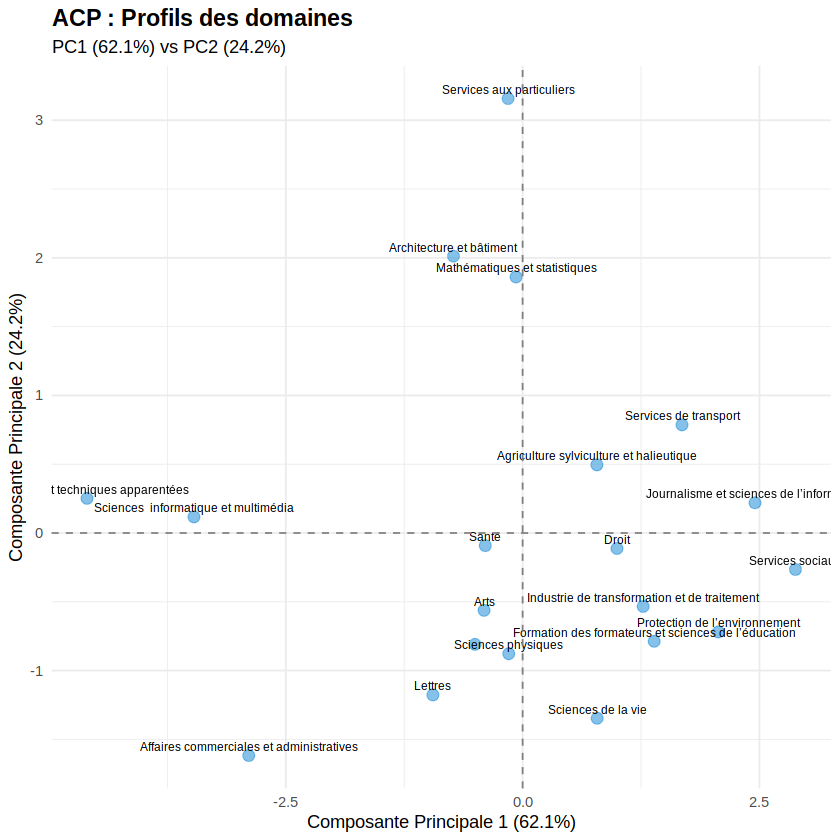

In [46]:
# Créer un dataframe pour le graphique
pca_scores <- as.data.frame(pca_result$x[, 1:2])
pca_scores$domaine <- rownames(pca_scores)

# Biplot : visualisation des domaines sur les 2 premières composantes
ggplot(pca_scores, aes(x = PC1, y = PC2)) +
  geom_point(size = 3, color = "#3498db", alpha = 0.6) +
  geom_text(aes(label = domaine), size = 2.5, hjust = 0.5, vjust = -0.5, check_overlap = TRUE) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  geom_vline(xintercept = 0, linetype = "dashed", color = "gray50") +
  labs(
    title = "ACP : Profils des domaines",
    subtitle = sprintf("PC1 (%.1f%%) vs PC2 (%.1f%%)", variance_expliquee[1], variance_expliquee[2]),
    x = sprintf("Composante Principale 1 (%.1f%%)", variance_expliquee[1]),
    y = sprintf("Composante Principale 2 (%.1f%%)", variance_expliquee[2])
  ) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold", size = 14))

### 5.2 Clustering (K-means) : Regroupement des domaines

**🔬 Le Clustering K-means** est une méthode d'apprentissage non supervisé :

**📌 Principe :**
- Partitionne les observations en K groupes (clusters)
- Chaque observation appartient au cluster dont le centre (centroïde) est le plus proche
- Minimise la variance intra-cluster (observations d'un même groupe sont similaires)
- Maximise la variance inter-cluster (groupes différents sont distincts)

**📌 Utilité :**
- Découvrir des groupes naturels dans les données
- Segmentation automatique sans étiquettes pré-définies
- Identifier des profils types

**📌 Dans notre cas :**
Nous allons créer 3 ou 4 groupes de domaines ayant des profils similaires (genre, volume, diversité).

In [47]:
# Appliquer K-means avec k=4 clusters
set.seed(123)  # Pour la reproductibilité
kmeans_result <- kmeans(scale(pca_matrix), centers = 4, nstart = 25)

# Ajouter les clusters aux données
pca_data$Cluster <- as.factor(kmeans_result$cluster)

cat("\n=== RÉSULTATS DU CLUSTERING (K=4) ===\n")
cat("\nTaille des clusters:")
print(table(pca_data$Cluster))

# Profil de chaque cluster
cat("\n=== PROFIL DES CLUSTERS ===\n")
profils_clusters <- pca_data %>%
  group_by(Cluster) %>%
  summarise(
    Nb_domaines = n(),
    Moy_Total = round(mean(Total_diplomes)),
    Moy_Pct_Femmes = round(mean(Pct_Femmes), 1),
    Moy_Nb_specialites = round(mean(Nb_specialites))
  )

print(profils_clusters)

# Afficher les domaines de chaque cluster
cat("\n=== DOMAINES PAR CLUSTER ===\n")
for(i in 1:4) {
  cat("\n--- Cluster", i, "---\n")
  domaines_cluster <- pca_data %>% filter(Cluster == i) %>% select(domaine_nom)
  print(domaines_cluster)
}


=== RÉSULTATS DU CLUSTERING (K=4) ===

Taille des clusters:
1 2 3 4 
3 3 6 8 

=== PROFIL DES CLUSTERS ===
# A tibble: 4 × 5
  Cluster Nb_domaines Moy_Total Moy_Pct_Femmes Moy_Nb_specialites
  <fct>         <int>     <dbl>          <dbl>              <dbl>
1 1                 3      8706           58.9                157
2 2                 3      1009           51.7                 17
3 3                 6      3094           80.5                 87
4 4                 8       986           84.3                 20

=== DOMAINES PAR CLUSTER ===

--- Cluster 1 ---
# A tibble: 3 × 1
  domaine_nom                             
  <chr>                                   
1 Affaires commerciales et administratives
2 Ingénierie et techniques apparentées    
3 Sciences  informatique et multimédia    

--- Cluster 2 ---
# A tibble: 3 × 1
  domaine_nom                  
  <chr>                        
1 Architecture et bâtiment     
2 Mathématiques et statistiques
3 Services aux particuliers    

### 5.3 Visualisation : ACP avec clusters colorés

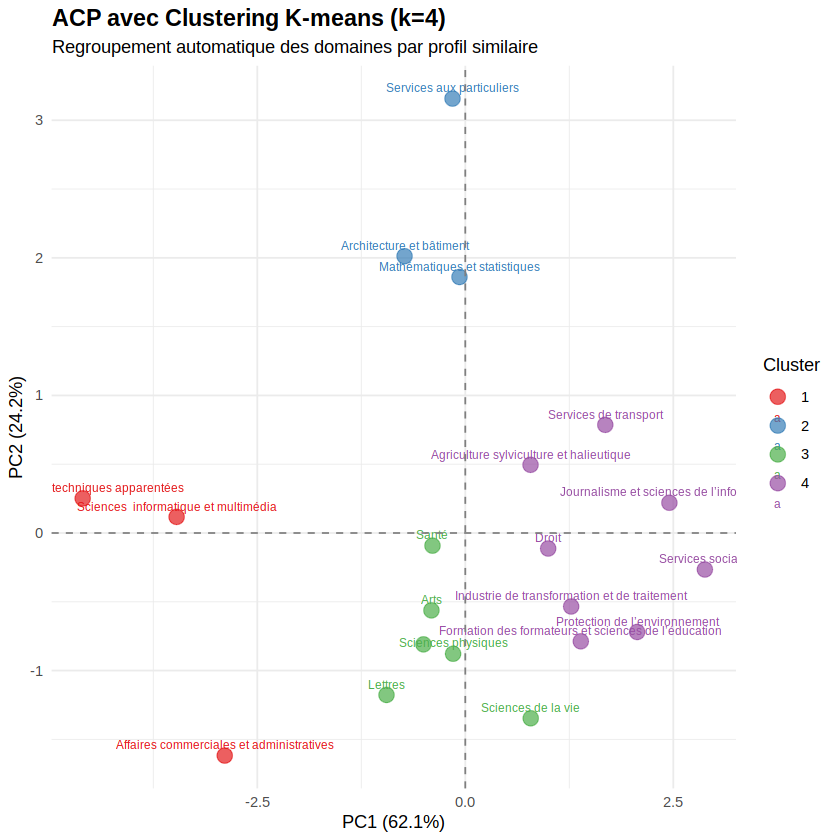

In [48]:
# Ajouter les clusters au dataframe de l'ACP
pca_scores$Cluster <- pca_data$Cluster

# Graphique ACP avec clusters colorés
ggplot(pca_scores, aes(x = PC1, y = PC2, color = Cluster)) +
  geom_point(size = 4, alpha = 0.7) +
  geom_text(aes(label = domaine), size = 2.5, hjust = 0.5, vjust = -0.7, check_overlap = TRUE) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  geom_vline(xintercept = 0, linetype = "dashed", color = "gray50") +
  scale_color_brewer(palette = "Set1") +
  labs(
    title = "ACP avec Clustering K-means (k=4)",
    subtitle = "Regroupement automatique des domaines par profil similaire",
    x = sprintf("PC1 (%.1f%%)", variance_expliquee[1]),
    y = sprintf("PC2 (%.1f%%)", variance_expliquee[2]),
    color = "Cluster"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold", size = 14),
    legend.position = "right"
  )

---

## Analyse 6 : Mismatch académique et implications

### 📊 Objectif
Analyser l'équilibre entre production académique et diversification, identifier les risques de surproduction.

### 🔍 Méthode : Analyse descriptive + indices de concentration

**📌 Concept de Mismatch académique :**
Le "mismatch" (décalage) académique désigne le déséquilibre entre :
- L'offre de diplômés (production académique)
- La demande du marché du travail (besoins économiques)

**📌 Indicateurs analysés :**
1. **Concentration excessive** : Trop de diplômés dans certains domaines
2. **Diversification faible** : Manque de variété dans certaines formations
3. **Saturation potentielle** : Domaines surproduisant des diplômés

**📌 Implications :**
- Chômage des diplômés dans les domaines saturés
- Pénurie dans les domaines sous-représentés
- Nécessité de réorientation des politiques éducatives

In [51]:
# Analyse de concentration et risque de surproduction
mismatch_analyse <- domaines_prodution %>%
  mutate(
    Categorie = case_when(
      Pct_cumule <= 50 ~ "Domaines hyper-productifs (50% des diplômés)",
      Pct_cumule <= 80 ~ "Domaines productifs",
      TRUE ~ "Domaines à faible production"
    ),
    Risque_saturation = case_when(
      Pct > 15 ~ "Risque élevé",
      Pct > 10 ~ "Risque moyen",
      Pct > 5 ~ "Risque faible",
      TRUE ~ "Risque minimal"
    )
  )

cat("\n=== ANALYSE DU MISMATCH ACADÉMIQUE ===\n")

# Domaines à risque de surproduction
cat("\n1️⃣ DOMAINES À RISQUE DE SURPRODUCTION (>10% des diplômés)")
domaines_risque <- mismatch_analyse %>% filter(Pct > 10)
cat("\nNombre de domaines:", nrow(domaines_risque))
print(domaines_risque %>% select(domaine_nom, Total_diplomes, Pct, Risque_saturation))

# Concentration
cat("\n\n2️⃣ INDICE DE CONCENTRATION (HERFINDAHL)")
indice_herfindahl <- sum((mismatch_analyse$Pct / 100)^2)
cat("\nIndice HHI:", round(indice_herfindahl, 4))
cat("\nInterprétation:", 
    ifelse(indice_herfindahl > 0.15, "FORTE concentration",
    ifelse(indice_herfindahl > 0.10, "Concentration MODÉRÉE", "Faible concentration")))

# Diversification
cat("\n\n3️⃣ DIVERSIFICATION DE L'OFFRE")
cat("\nNombre total de domaines:", nrow(mismatch_analyse))
domaines_faible_prod <- mismatch_analyse %>% filter(Pct < 2)
cat("\nDomaines marginaux (<2%):", nrow(domaines_faible_prod))
cat("\nRatio diversification:", round(nrow(domaines_faible_prod) / nrow(mismatch_analyse) * 100, 1), "%")

# Recommandations
cat("\n\n4️⃣ RECOMMANDATIONS STRATÉGIQUES\n")
cat("\n✅ Points d'attention :\n")
cat("- Les", nrow(domaines_risque), "premiers domaines concentrent", round(sum(domaines_risque$Pct), 1), "% des diplômés\n")
cat("- Risque de saturation dans certains domaines\n")
cat("- Diversification à renforcer dans les domaines émergents\n")

cat("\n✅ Implications pour l'emploi :\n")
cat("- Surproduction potentielle dans :", paste(head(domaines_risque$domaine_nom, 3), collapse = ", "), "\n")
cat("- Nécessité d'études sectorielles sur l'employabilité\n")
cat("- Réorientation possible vers domaines moins saturés\n")

cat("\n✅ Recommandations politiques :\n")
cat("- Ajuster les quotas d'admission dans les domaines surreprésentés\n")
cat("- Promouvoir les filières sous-représentées mais en demande\n")
cat("- Renforcer l'orientation vers les métiers d'avenir\n")


=== ANALYSE DU MISMATCH ACADÉMIQUE ===

1️⃣ DOMAINES À RISQUE DE SURPRODUCTION (>10% des diplômés)
Nombre de domaines: 3# A tibble: 3 × 4
  domaine_nom                             Total_diplomes   Pct Risque_saturation
  <chr>                                            <dbl> <dbl> <chr>            
1 Affaires commerciales et administrativ…          11591  20.8 Risque élevé     
2 Ingénierie et techniques apparentées              7384  13.3 Risque moyen     
3 Sciences  informatique et multimédia              7144  12.8 Risque moyen     


2️⃣ INDICE DE CONCENTRATION (HERFINDAHL)
Indice HHI: 0.106
Interprétation: Concentration MODÉRÉE

3️⃣ DIVERSIFICATION DE L'OFFRE
Nombre total de domaines: 22
Domaines marginaux (<2%): 9
Ratio diversification: 40.9 %

4️⃣ RECOMMANDATIONS STRATÉGIQUES

✅ Points d'attention :
- Les 3 premiers domaines concentrent 46.9 % des diplômés
- Risque de saturation dans certains domaines
- Diversification à renforcer dans les domaines émergents

✅ Implications po

---

# CONCLUSION GÉNÉRALE

## 🎯 Synthèse des analyses réalisées

### 📊 **Méthodes statistiques utilisées**

1. **Analyse univariée**
   - Comptages, moyennes, pourcentages
   - Distribution des effectifs

2. **Analyse bivariée (tableaux croisés)**
   - Genre × Domaine
   - Domaine × Type de diplôme
   - Université × Genre

3. **Analyse multivariée (ACP)**
   - Réduction de dimensionnalité
   - Identification de profils similaires
   - Visualisation en 2D de données multidimensionnelles

4. **Clustering (K-means)**
   - Segmentation automatique
   - Regroupement par similarité
   - Identification de typologies

5. **Indices de concentration**
   - Analyse Pareto
   - Indice de Herfindahl
   - Évaluation de la diversification

---

## 🔑 Principaux résultats

### 1️⃣ **Déséquilibre de genre marqué**
- 70% de femmes diplômées vs 30% d'hommes
- Domaines fortement genrés (à identifier dans vos résultats)
- Variations importantes selon les universités

### 2️⃣ **Concentration de la production**
- Quelques domaines produisent la majorité des diplômés
- Risque de surproduction dans certaines filières
- Diversification limitée

### 3️⃣ **Profils d'établissements variés**
- Établissements spécialisés vs polyvalents
- Volumes de production très hétérogènes
- Complémentarité géographique

### 4️⃣ **Structure des diplômes**
- Distribution inégale Licence/Mastère/Doctorat selon domaines
- Spécificités disciplinaires fortes

### 5️⃣ **Enjeux stratégiques**
- Nécessité d'ajuster l'offre de formation
- Importance de l'orientation des étudiants
- Adéquation formation-emploi à améliorer

---

## 📈 Perspectives

Ce travail statistique constitue une base solide pour :
- Orienter les politiques éducatives
- Informer les choix des étudiants
- Anticiper les besoins du marché du travail
- Optimiser l'allocation des ressources universitaires

---

**Projet réalisé dans le cadre du cours d'analyse statistique avec R**

**Étudiant :** Abderrahmen Youssef — Groupe DS4